<a href="https://colab.research.google.com/github/Phillkao/2019_IMDB/blob/master/2019IMDB_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install PyDrive

     |████████████████████████████████| 993kB 3.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [3]:
import os

from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive

from google.colab import auth

from oauth2client.client import GoogleCredentials

auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

W0719 21:45:56.318131 140633921263488 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
download = drive.CreateFile({'id': '1GmIaKtp2DCepUgY3f2cVg9Um7WuYbU9_'})

In [5]:
download.GetContentFile('train.zip')
!unzip train.zip

W0719 21:45:57.480229 140633921263488 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

Archive:  train.zip
  inflating: G49_158.png             
  inflating: G49_159.png             
  inflating: G49_160.png             
  inflating: G49_161.png             
  inflating: G49_162.png             
  inflating: G49_163.png             
  inflating: G49_164.png             
  inflating: G49_165.png             
  inflating: G49_166.png             
  inflating: G49_167.png             
  inflating: G49_168.png             
  inflating: G49_169.png             
  inflating: G49_170.png             
  inflating: G49_171.png             
  inflating: G49_172.png             
  inflating: G49_173.png             
  inflating: G49_174.png             
  inflating: G49_175.png             
  inflating: G49_176.png             
  inflating: G49_177.png             
  inflating: G49_178.png             
  inflating: G49_179.png             
  inflating: G49_180.png             
  inflating: G49_181.png             
  inflating: G49_182.png             
  inflating: G49_183.png      

In [6]:
import keras

from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten

from keras.layers import Conv2D, MaxPooling2D

from keras.utils import to_categorical

from keras.preprocessing import image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tqdm import tqdm

Using TensorFlow backend.


In [0]:
train = pd.read_csv('train.csv')

In [9]:
train_image = []

for i in tqdm(range(train.shape[0])):

    img = image.load_img(train['picture'][i]+'.png', target_size=(28,28,1), grayscale=True)

    img = image.img_to_array(img)

    img = img/255

    train_image.append(img)

X = np.array(train_image)

  0%|          | 0/1362 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 1362/1362 [00:04<00:00, 277.32it/s]


In [0]:
a = train['label'].values

In [0]:
for i in range(train.shape[0]):
  train['label'][i] = a[i][1:]

In [0]:
y=train['label'].values
y = to_categorical(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100 , test_size=0.2)

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(50, activation='softmax'))

W0719 21:46:05.792743 140633921263488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 21:46:05.797702 140633921263488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 21:46:05.802716 140633921263488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 21:46:05.861574 140633921263488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0719 21:46:05.867715 140633921263488 deprecation_wrapp

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

W0719 21:46:05.958259 140633921263488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0719 21:46:05.990938 140633921263488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [17]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Train on 1089 samples, validate on 273 samples
Epoch 1/50
1089/1089 [==============================] - 4s 3ms/step - loss: 0.5684 - acc: 0.8173 - val_loss: 0.4020 - val_acc: 0.8498
Epoch 2/50
1089/1089 [==============================] - 4s 3ms/step - loss: 0.4897 - acc: 0.8402 - val_loss: 0.3683 - val_acc: 0.8755
Epoch 3/50
1089/1089 [==============================] - 4s 3ms/step - loss: 0.4458 - acc: 0.8485 - val_loss: 0.3317 - val_acc: 0.8974
Epoch 4/50
1089/1089 [==============================] - 4s 3ms/step - loss: 0.4345 - acc: 0.8595 - val_loss: 0.3170 - val_acc: 0.8938
Epoch 5/50
1089/1089 [==============================] - 4s 3ms/step - loss: 0.3670 - acc: 0.8871 - val_loss: 0.2843 - val_acc: 0.9011
Epoch 6/50
1089/1089 [==============================] - 4s 3ms/step - loss: 0.3627 - acc: 0.8825 - val_loss: 0.2778 - val_acc: 0.9084
Epoch 7/50
1089/1089 [==============================] - 4s 3ms/step - loss: 0.3380 - acc: 0.8898 - val_loss: 0.2764 - val_acc: 0.9158
Epoch 8/50
1089

In [0]:
download = drive.CreateFile({'id': '1mhxdJ2Jsw83b2GxlzxOJIC7HYf0DDRyl'})

In [19]:
download.GetContentFile('test.zip')
!unzip test.zip

Archive:  test.zip
  inflating: G49_226.png             
  inflating: G49_227.png             
  inflating: G49_228.png             
  inflating: G49_229.png             
  inflating: G49_230.png             
  inflating: G49_231.png             
  inflating: G49_232.png             
  inflating: G49_233.png             
  inflating: G49_234.png             
  inflating: G49_235.png             
  inflating: G49_236.png             
  inflating: G49_237.png             
  inflating: G49_238.png             
  inflating: test.csv                
  inflating: G11_103.png             
  inflating: G11_104.png             
  inflating: G11_105.png             
  inflating: G11_106.png             
  inflating: G11_107.png             
  inflating: G11_108.png             
  inflating: G11_109.png             
  inflating: G11_110.png             
  inflating: G11_111.png             
  inflating: G11_112.png             
  inflating: G11_113.png             
  inflating: G11_114.png       

In [0]:
test = pd.read_csv('test.csv')

In [21]:
test_image = []

for i in tqdm(range(test.shape[0])):

    img = image.load_img(test['picture'][i]+'.png', target_size=(28,28,1), grayscale=True)

    img = image.img_to_array(img)

    img = img/255

    test_image.append(img)

test_s = np.array(test_image)

  0%|          | 0/154 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 154/154 [00:00<00:00, 284.28it/s]


In [0]:
P = model.predict_classes(test_s)

In [0]:
def acc(a, b):
  return 'The accurency of prediction = %f' % float(a/b)

In [0]:
k = test['picture'].values
for i in range(test.shape[0]):
  test['label'][i] = k[i][1:3]

In [44]:
s = test['label'].values
a = 0
for i in range(len(s)):
  if int(s[i]) == P[i]:
    a = a + 1
acc(a, len(s))

'The accurency of prediction = 0.948052'

In [0]:
a = test_image[100].reshape(28,28)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


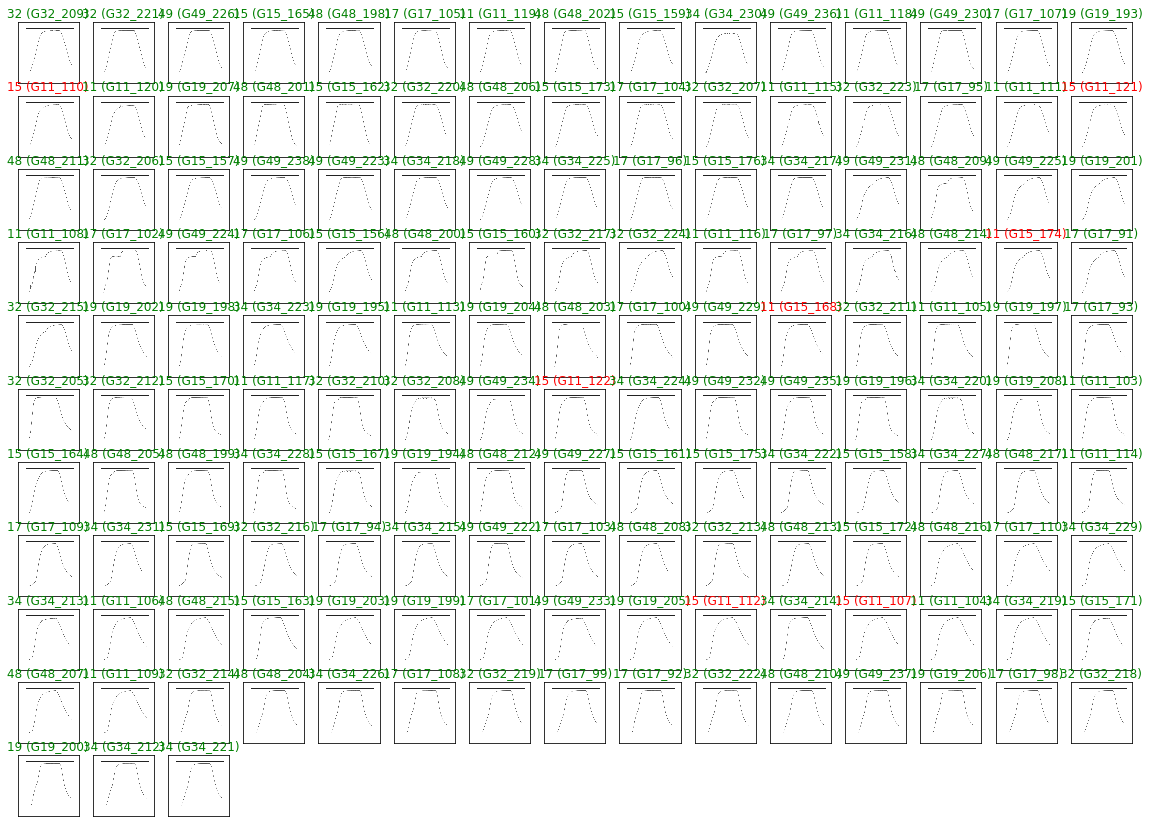

In [112]:
fig = plt.figure(figsize=(20,20))
for i, idx in enumerate(np.random.choice(range(154), size=153, replace=False)):
    ax = fig.add_subplot(15, 15, i + 1, xticks=[], yticks=[])
    img222 = image.load_img(test['picture'][i]+'.png', grayscale=True)
    ax.imshow(img222, cmap = 'gray')
    ax.set_title("{} ({})".format(P[idx], test['picture'][idx]),color=("green" if int(s[idx]) == P[idx] else "red"))


In [104]:
test.shape[0]

154

## RNN

9.24